<a href="https://colab.research.google.com/github/emilianodesu/SIAFI-2026-1/blob/main/DL/3_2_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# 3. Deep Learning

## 3.2 Artificial Neurons and the Perceptron

### 3.2.1 Biological Neurons

Before we discuss artificial neurons, let’s take a quick look at a biological neuron. It is an unusual-looking cell mostly found in animal brains. It’s composed of a *cell body* containing the nucleus and most of the cell’s complex components, many branching extensions called *dendrites*, plus one very long extension called the *axon*. The axon’s length may be just a few times longer than the cell body, or up to tens of thousands of times longer. Near its extremity the axon splits off into many branches called *telodendria*, and at the tip of these branches are minuscule structures called *synaptic* terminals (or simply *synapses*), which are connected to the dendrites or cell bodies of other neurons. Biological neurons produce short electrical impulses called *action potentials* (APs, or just *signals*), which travel along the axons and make the synapses release chemical signals called *neurotransmitters*. When a neuron receives a sufficient amount of these neurotransmitters within a few milliseconds, it fires its own electrical impulses (actually, it depends on the neurotransmitters, as some of them inhibit the neuron from firing).

![A biological Neuron](./img/bioneuron.png)

Thus, individual biological neurons seem to behave in a simple way, but they’re organized in a vast network of billions, with each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a network of fairly simple neurons, much like a complex anthill can emerge from the combined efforts of simple ants. The architecture of biological neural networks (BNNs) is the subject of active research, but some parts of the brain have been mapped. These efforts show that neurons are often organized in consecutive layers, especially in the cerebral cortex (the outer layer of the brain).

![Multiple layers in a biological neural network (human cortex)](./img/layers.png)

### 3.2.2 Logical Computations with Neurons

McCulloch and Pitts proposed a very simple model of the biological neuron, which later became known as an *artificial neuron*: it has one or more binary (on/off) inputs and one binary output. The artificial neuron activates its output when more than a certain number of its inputs are active. In their paper, McCulloch and Pitts showed that even with such a simplified model it is possible to build a network of artificial neurons that can compute any logical proposition you want. To see how such a network works, let’s build a few ANNs that perform various logical computations, assuming that a neuron is activated when at least two of its input connections are active.

![ANNs performing simple logical computations](./img/ann.png)

Let’s see what these networks do:

* The first network on the left is the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A); but if neuron A is off, then neuron C is off as well.

* The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).

* The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).
* Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.

You can imagine how these networks can be combined to compute complex logical expressions 

### 3.2.3 The Perceptron

The *perceptron* is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a *threshold logic unit* (TLU), or sometimes a *linear threshold unit* (LTU). The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU first computes a linear function of its inputs: $z = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b = \mathbf{w}^T \mathbf{x} + b$. Then it applies a *step function* to the result: $h_{\mathbf{w}}(x) = \text{step}(z)$. So it’s almost like logistic regression, except it uses a step function instead of the logistic function.⁠ Just like in logistic regression, the model parameters are the input weights $\mathbf{w}$ and the bias term $b$.

![TLU: an artificial neuron that computes a weighted sum of its inputs, plus a bias term, then applies a step function](./img/tlu.png)

The most common step function used in perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

**Equation 1: Common step functions used in perceptrons (assumed threshold at zero)**

$$ \text{Heaviside step function:} \quad \text{step}(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ 0 & \text{if } z < 0 \end{cases} $$

$$ \text{Sign function:} \quad \text{sign}(z) = \begin{cases} 1 & \text{if } z > 0 \\ -1 & \text{if } z < 0 \\ 0 & \text{if } z = 0 \end{cases} $$

A single TLU can be used for simple linear binary classification. It computes a linear function of its inputs, and if the result exceeds a threshold, it outputs the positive class. Otherwise, it outputs the negative class. This may remind you of logistic regression. You could, for example, use a single TLU to classify iris flowers based on petal length and width. Training such a TLU would require finding the right values for $w_1, w_2,$ and $b$.

A perceptron is composed of one or more TLUs organized in a single layer, where every TLU is connected to every input. Such a layer is called a *fully connected layer*, or a *dense layer*. The inputs constitute the *input layer*. And since the layer of TLUs produces the final outputs, it is called the *output layer*. For example, a perceptron with two inputs and three outputs is represented as:

![Architecture of a perceptron with two inputs and three output neurons](./img/perceptron.png)

This perceptron can classify instances simultaneously into three different binary classes, which makes it a multilabel classifier. It may also be used for multiclass classification.

Thanks to the magic of linear algebra, the next equation can be used to efficiently compute the outputs of a layer of artificial neurons for several instances at once.

**Equation 2: Computing the outputs of a fully connected layer**

$$ \hat{\mathbf{Y}} = \phi(\mathbf{X} \mathbf{W} + \mathbf{b}) $$

In this equation:

* $\hat{\mathbf{Y}}$ is the output matrix. It has one row per instance and one column per neuron.
* $\mathbf{X}$ is the input matrix. It has one row per instance and one column per input feature.
* The weight matrix $\mathbf{W}$ contains all the connection weights. It has one row per input feature and one column per neuron.
* The bias vector $\mathbf{b}$ contains the bias term for each neuron. It has one entry per neuron.
* The function $\phi$ is called the *activation function*: when the artificial neurons are TLUs, it is a step function (we will discuss other activation functions shortly).

So, how is a perceptron trained? Perceptrons are trained using a learning rule that takes into account the error made by the network when it makes a prediction; the perceptron learning rule reinforces connections that help reduce the error. More specifically, the perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.

**Equation 3: Perceptron learning rule (weight update)**

$$ w_{ij} \leftarrow w_{ij} + \eta (y_j - \hat{y}_j) x_i $$

In this equation:

* $w_{ij}$ is the connection weight between the $i$-th input and the $j$-th output neuron.
* $x_i$ is the $i$-th input value of the current training instance.
* $\hat{y}_j$ is the output of the $j$-th output neuron for the current training instance.
* $y_j$ is the target output of the $j$-th output neuron for the current training instance.
* $\eta$ is the learning rate.

The decision boundary of each output neuron is linear, so perceptrons are incapable of learning complex patterns (just like logistic regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm will converge to a solution.⁠ This is called the *perceptron convergence theorem*.

Scikit-Learn provides a `Perceptron` class that can be used pretty much as you would expect—for example, on the iris dataset:

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [3]:
y_pred

array([ True, False])

The `Perceptron` is equivalent to a `SGDClassifier` with `loss="perceptron"`, no regularization, and a constant learning rate equal to 1:

### 3.2.4 Multi-layer Perceptron 

In their 1969 monograph, *Perceptrons*, Marvin Minsky and Seymour Papert highlighted a number of serious weaknesses of perceptrons—in particular, the fact that they are incapable of solving some trivial problems (e.g., the *exclusive OR* (XOR) classification problem). This is true of any other linear classification model (such as logistic regression classifiers), but researchers had expected much more from perceptrons, and some were so disappointed that they dropped neural networks altogether in favor of more formal approaches such as logic, problem solving, and search. The lack of practical applications also didn’t help.

It turns out that some of the limitations of perceptrons can be eliminated by stacking multiple perceptrons. The resulting ANN is called a *multilayer perceptron* (MLP). An MLP can solve the XOR problem: with inputs (0, 0) or (1, 1), the network outputs 0, and with inputs (0, 1) or (1, 0) it outputs 1.

![XOR classification problem and an MLP that solves it](./img/xor.png)

An MLP is composed of one input layer, one or more layers of artificial neurons (originally TLUs) called *hidden layers*, and one final layer of artificial neurons called the output layer. The layers close to the input layer are usually called the *lower layers*, and the ones close to the outputs are usually called the *upper layers*.

![Architecture of a multilayer perceptron with two inputs, one hidden layer of four neurons, and three output neurons](./img/mlp.png)

**Note**: The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a *feedforward neural network* (FNN).

When an ANN contains a deep stack of hidden layers,⁠ it is called a *deep neural network* (DNN). The field of deep learning studies DNNs, and more generally it is interested in models containing deep stacks of computations. Even so, many people talk about deep learning whenever neural networks are involved (even shallow ones).

#### 3.2.4.1 Backpropagation

For many years researchers struggled to find a way to train MLPs, without success. In the early 1960s several researchers discussed the possibility of using gradient descent to train neural networks, but this requires computing the gradients of the model’s error with regard to the model parameters; it wasn’t clear at the time how to do this efficiently with such a complex model containing so many parameters, especially with the computers they had back then.

Then, in 1970, a researcher named Seppo Linnainmaa introduced in his master’s thesis a technique to compute all the gradients automatically and efficiently. This algorithm is now called *reverse-mode automatic differentiation* (or *reverse-mode autodiff* for short). In just two passes through the network (one forward, one backward), it is able to compute the gradients of the neural network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias should be tweaked in order to reduce the neural network’s error. These gradients can then be used to perform a gradient descent step. If you repeat this process of computing the gradients automatically and taking a gradient descent step, the neural network’s error will gradually drop until it eventually reaches a minimum. This combination of reverse-mode autodiff and gradient descent is now called *backpropagation* (or *backprop* for short).

Here’s an analogy: imagine you are learning to shoot a basketball into the hoop. You throw the ball (that’s the forward pass), and you observe that it went far off to the right side (that’s the error computation), then you consider how you can change your body position to throw the ball a bit less to the right next time (that’s the backward pass): you realize that your arm will need to rotate a bit counterclockwise, and probably your whole upper body as well, which in turn means that your feet should turn too (notice how we’re going down the “layers”). Once you’ve thought it through, you actually move your body: that’s the gradient descent step. The smaller the errors, the smaller the adjustments. As you repeat the whole process many times, the error gradually gets smaller, and after a few hours of practice, you manage to get the ball through the hoop every time. Good job!

Let’s run through how backpropagation works again in a bit more detail:

* It handles one mini-batch at a time, and goes through the full training set multiple times. If each mini-batch contains 32 instances, and each instance has 100 features, then the mini-batch will be represented as a matrix with 32 rows and 100 columns. Each pass through the training set is called an *epoch*.
* For each mini-batch, the algorithm computes the output of all the neurons in the first hidden layer. If the layer has 50 neurons, then its output is a matrix with one row per sample in the mini-batch (e.g., 32), and 50 columns (i.e., one per neuron). This matrix is then passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the *forward pass*: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
* Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
* Then it computes how much each output layer parameter contributed to the error. This is done analytically by applying the *chain rule* (one of the most fundamental rules in calculus), which makes this step fast and precise. The result is one gradient per parameter.
* The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until it reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights and biases in the network by propagating the error gradient backward through the network (hence the name of the algorithm).
* Finally, the algorithm performs a gradient descent step to tweak all the connection weights and bias terms in the network, using the error gradients it just computed.

**Warning**: It is important to initialize all the hidden layers’ connection weights randomly, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. If instead you randomly initialize the weights, you *break the symmetry* and allow backpropagation to train a diverse team of neurons.

In short, backpropagation makes predictions for a mini-batch (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each parameter (reverse pass), and finally tweaks the connection weights and biases to reduce the error (gradient descent step).

#### 3.2.4.2 Activation Functions

In order for backprop to work properly, Rumelhart and his colleagues made a key change to the MLP’s architecture: they replaced the step function with the *sigmoid* function. This was essential because the step function contains only flat segments, so there is no gradient to work with (gradient descent cannot move on a flat surface), while the sigmoid function has a well-defined nonzero derivative everywhere, allowing gradient descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other activation functions, not just the sigmoid function. Here are two other popular choices:

* *The hyperbolic tangent function*: $\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$. Just like the sigmoid function, this activation function is S-shaped, continuous, and differentiable, but its output value ranges from –1 to 1 (instead of 0 to 1 in the case of the sigmoid function). That range tends to make each layer’s output more or less centered around 0 at the beginning of training, which often helps speed up convergence.

* *The rectified linear unit (ReLU)*: $\text{ReLU}(z) = \max(0, z)$. The ReLU function is continuous but unfortunately not differentiable at $z = 0$ (the slope changes abruptly, which can make gradient descent bounce around), and its derivative is $0$ for $z < 0$. In practice, however, it works very well and has the advantage of being fast to compute, so it has become the default for most architectures.⁠ Importantly, the fact that it does not have a maximum output value helps reduce some issues during gradient descent 

These popular activation functions and their derivatives are represented in the next figure. But wait! Why do we need activation functions in the first place? Well, if you chain several linear transformations, all you get is a linear transformation. For example, if $f(x) = 2x + 3$ and $g(x) = 5x – 1$, then chaining these two linear functions gives you another linear function: $f(g(x)) = 2(5x – 1) + 3 = 10x + 1$. So if you don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and you can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.

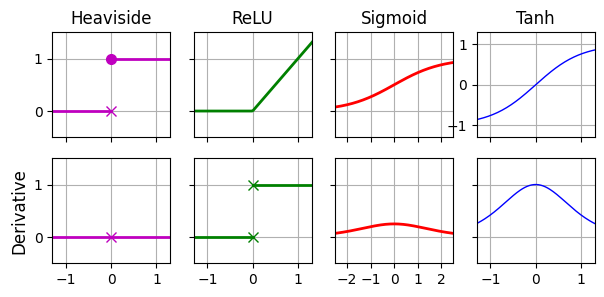

In [4]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

max_z = 2.5
z = np.linspace(-max_z, max_z, 200)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(7, 3))

axes[0, 0].plot([-max_z, 0], [0, 0], "m-", linewidth=2)
axes[0, 0].plot(0, 0, "mx", markersize=7)
axes[0, 0].plot(0, 1, "mo", markersize=7)
axes[0, 0].plot([0, max_z], [1, 1], "m-", linewidth=2)
axes[0, 0].set_title("Heaviside", fontsize=12)
axes[1, 0].plot(z, derivative(np.sign, z), "m-", linewidth=2)
axes[1, 0].plot(0, 0, "mx", markersize=7)
axes[1, 0].set_ylabel("Derivative", fontsize=12)

axes[0, 1].plot(z, relu(z), "g-", linewidth=2)
axes[0, 1].set_title("ReLU", fontsize=12)
axes[1, 1].plot([-max_z, 0], [0, 0], "g-", linewidth=2)
axes[1, 1].plot([0, max_z], [1, 1], "g-", linewidth=2)
axes[1, 1].plot(0, 0, "gx", markersize=7)
axes[1, 1].plot(0, 1, "gx", markersize=7)

axes[0, 2].plot(z, sigmoid(z), "r-", linewidth=2)
axes[0, 2].set_title("Sigmoid", fontsize=12)
axes[1, 2].plot(z, derivative(sigmoid, z), "r-", linewidth=2)

axes[0, 3].plot(z, np.tanh(z), "b-", linewidth=1)
axes[0, 3].set_title("Tanh", fontsize=12)
axes[1, 3].plot(z, derivative(np.tanh, z), "b-", linewidth=1)

for row in range(2):
    for col in range(4):
        axes[row, col].grid(True)
        if row == 0:
            axes[row, col].set_xticklabels([])
        if col == 2:
            axes[row, col].set_xlim(-max_z, max_z)
            axes[row, col].set_xticks([-2, -1, 0, 1, 2])
        else:
            axes[row, col].set_xlim(-1.3, 1.3)
            axes[row, col].set_xticks([-1, 0, 1])
        if col != 0 and ((row, col) != (0, 3)):
            axes[row, col].set_yticklabels([])
        if (row, col) == (0, 3):
            axes[row, col].set_ylim(-1.3, 1.3)
            axes[row, col].set_yticks([-1, 0, 1])
        else:
            axes[row, col].set_ylim(-0.5, 1.5)
            axes[row, col].set_yticks([0, 1])

plt.show()

OK! You know where neural nets came from, what the MLP architecture looks like, and how it computes its outputs. You’ve also learned about the backpropagation algorithm. It’s time to see MLPs in action!

#### 3.2.4.3 Regression MLPs 

How would you build an MLP for a regression task? Well, if you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension. For example, to locate the center of an object in an image, you need to predict 2D coordinates, so you need two output neurons. If you also want to place a bounding box around the object, then you need two more numbers: the width and the height of the object. So, you end up with four output neurons.

Scikit-Learn includes an `MLPRegressor` class, so let’s use it to build an MLP with three hidden layers composed of 50 neurons each, and train it on the California housing dataset. For simplicity, we will use Scikit-Learn’s `fetch_california_housing()` function to load the data. Let’s start by importing everything we will need:

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Next, let’s fetch the California housing dataset and split it into a training set and a test set:

In [6]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

Now let’s create an `MLPRegressor` model with 3 hidden layers composed of 50 neurons each. The first hidden layer’s input size (i.e., the number of rows in its weights matrix) and the output layer’s output size (i.e., the number of columns in its weights matrix) will adjust automatically to the dimensionality of the inputs and targets, respectively, when training starts. The model uses the ReLU activation function in all hidden layers, and no activation function at all on the output layer. We also set verbose=True to get details on the model’s progress during training:

In [7]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], early_stopping=True,
                       verbose=True, random_state=42)

Since neural nets can have a lot of parameters, they have a tendency to overfit the training set. To reduce this risk, one option is to use early stopping: when we set `early_stopping=True`, the `MLPRegressor` class automatically sets aside 10% of the training data and uses it to evaluate the model at each epoch (you can adjust the validation set’s size by setting `validation_fraction`). If the validation score stops improving for 10 epochs, training automatically stops (you can tweak this number of epochs by setting `n_iter_no_change`).

Now let’s create a pipeline to standardize the input features before sending them to the `MLPRegressor`. This is very important because gradient descent does not converge very well when the features have very different scales. We can then train the model! The `MLPRegressor` class uses a variant of gradient descent called *Adam* to minimize the mean squared error. It also uses a tiny bit of $L_2$ regularization (you can control its strength via the `alpha` hyperparameter, which defaults to 0.0001):

In [8]:
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

Iteration 1, loss = 0.85190332
Validation score: 0.534299
Iteration 2, loss = 0.28288639
Validation score: 0.651094
Iteration 3, loss = 0.22884372
Validation score: 0.699782
Iteration 4, loss = 0.20746145
Validation score: 0.720468
Iteration 5, loss = 0.19649383
Validation score: 0.724839
Iteration 6, loss = 0.18928708
Validation score: 0.740084
Iteration 7, loss = 0.18132029
Validation score: 0.747406
Iteration 8, loss = 0.17556450
Validation score: 0.753945
Iteration 9, loss = 0.17190651
Validation score: 0.760500
Iteration 10, loss = 0.16687650
Validation score: 0.759213
Iteration 11, loss = 0.16329479
Validation score: 0.761907
Iteration 12, loss = 0.16054473
Validation score: 0.768950
Iteration 13, loss = 0.15690181
Validation score: 0.762699
Iteration 14, loss = 0.15630644
Validation score: 0.766003
Iteration 15, loss = 0.15712517
Validation score: 0.778464
Iteration 16, loss = 0.15155981
Validation score: 0.774237
Iteration 17, loss = 0.14957641
Validation score: 0.778361
Iterat

,steps,"[('standardscaler', ...), ('mlpregressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,hidden_layer_sizes,"[50, 50, ...]"
,activation,'relu'
,solver,'adam'


And there you go, you just trained your very first MLP! It required 45 epochs, and as you can see, the training loss went down at each epoch. The validation score generally went up at each epoch. Like every regressor in Scikit-Learn, `MLPRegressor` uses the R2 score by default for evaluation—that’s what the `score()` method returns. The R2 score measures the ratio of the variance that is explained by the model. In this case, it reaches close to 80% on the validation set, which is fairly good for this task:

In [9]:
mlp_reg.best_validation_score_

0.791536125425778

Let’s evaluate the RMSE on the test set:

In [10]:
y_pred = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.5327699946812925

We get a test RMSE of about 0.53, which is comparable to what you would get with a random forest classifier. Not too bad for a first try! The next figure plots the model’s predictions versus the targets (on the test set). The dashed red line represents the ideal predictions (i.e., equal to the targets): most of the predictions are close to the targets, but there are still quite a few errors, especially for larger targets.

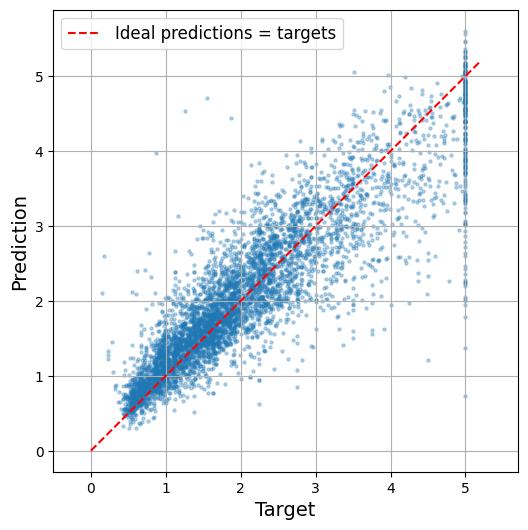

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, s=5, alpha=0.3)
plt.plot([0, 5.2], [0, 5.2], color='red', linestyle='--',
         label="Ideal predictions = targets")
plt.axis("equal")
plt.xlabel("Target")
plt.ylabel("Prediction")
plt.legend(fontsize=12)
plt.grid()

plt.show()

Note that this MLP does not use any activation function for the output layer, so it’s free to output any value it wants. This is generally fine, but if you want to guarantee that the output is always positive, then you should use the ReLU activation function on the output layer, or the *softplus* activation function, which is a smooth variant of ReLU: $\text{softplus}(z) = \log(1 + e^{z})$. Softplus is close to 0 when $z$ is negative, and close to $z$ when $z$ is positive. Finally, if you want to guarantee that the predictions always fall within a given range of values, then you should use the sigmoid function or the hyperbolic tangent, and scale the targets to the appropriate range: 0 to 1 for sigmoid and –1 to 1 for tanh. Sadly, the `MLPRegressor` class does not support activation functions in the output layer.

**Warning**: Scikit-Learn does not offer GPU acceleration, and its neural net features are fairly limited. This is why we will switch to PyTorch. That said, it is quite convenient to be able to build and train a standard MLP in just a few lines of code using Scikit-Learn: it lets you tackle many complex tasks very quickly.

In general, the mean squared error is the right loss to use for a regression tasks, but if you have a lot of outliers in the training set, you may sometimes prefer to use the mean absolute error instead, or preferably the *Huber loss*, which is a combination of both. Unfortunately, MLPRegressor only supports the MSE loss.

The next table summarizes the typical architecture of a regression MLP.

| Hyperparameter         | Typical Value                    |
|------------------------|----------------------------------|
| # hidden layers        | Depends on the problem, but typically 1 to 5             |
| # neurons per hidden layer    | Depends on the problem, but typically 10 to 100          |
| # output neurons     | 1 per target variable |
| Activation function (hidden layers) | ReLU (most common) |
| Activation function (output layer) | None, or ReLU/softplus (if positive outputs) or sigmoid/tanh (if bounded outputs) |
| Loss function          | Mean squared error (MSE), mean absolute error (MAE), or Huber loss |

All right, MLPs can tackle regression tasks. What else can they do?

#### 3.2.4.4 Classification MLPs

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the sigmoid activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.

MLPs can also easily handle multilabel binary classification tasks. For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons, both using the sigmoid activation function: the first would output the probability that the email is spam, and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent ham, urgent ham, nonurgent spam, and perhaps even urgent spam (although that would probably be an error).

If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer. The softmax function will ensure that all the estimated probabilities are between 0 and 1, and that they add up to 1, since the classes are exclusive. This is called multiclass classification.

Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss (or *x-entropy* or log loss for short) is generally a good choice.

![A modern MLP (including ReLU and softmax) for classification](./img/classification.png)

The next table summarizes the typical architecture of a classification MLP.

| Hyperparameter | Binary classification | Multiclass classification |
| --- | --- | --- |
| # hidden layers | Typically 1 to 5 layers | Typically 1 to 5 layers |
| # output neurons | 1 | 1 per class |
| Output activation function | Sigmoid | Softmax |
| Loss function | Binary cross-entropy | Categorical cross-entropy |

As you might expect, Scikit-Learn offers an `MLPClassifier` class in the `sklearn.neural_network` package, which you can use for binary or multiclass classification. It is almost identical to the `MLPRegressor` class, except that its output layer uses the softmax activation function, and it minimizes the cross-entropy loss rather than the MSE. Moreover, the `score()` method returns the model’s accuracy rather than the R2 score. Let’s try it out.

We could tackle the iris dataset, but that task is too simple for a neural net: a linear model would do just as well and wouldn’t risk overfitting. So let’s instead tackle a more complex task: Fashion MNIST. This is a drop-in replacement of MNIST. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is much more diverse, and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST. Let’s see if we can do better with an MLP.

First, let’s load the dataset using the `fetch_openml()` function. Note that the targets are represented as strings `0'`, `'1'`, …​, `'9'`, so we convert them to integers:

In [12]:
from sklearn.datasets import fetch_openml

fashion_mnist = fetch_openml(name="Fashion-MNIST", as_frame=False)
targets = fashion_mnist.target.astype(int)

The data is already shuffled, so we just take the first 60,000 images for training, and the last 10,000 for testing:

In [13]:
X_train, y_train = fashion_mnist.data[:60_000], targets[:60_000]
X_test, y_test = fashion_mnist.data[60_000:], targets[60_000:]

Each image is represented as a 1D integer array containing 784 pixel intensities ranging from 0 to 255. You can use the `plt.imshow()` function to plot an image, but first you need to reshape it to `[28, 28]`:

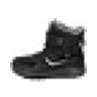

In [14]:
X_sample = X_train[0].reshape(28, 28)  # first image in the training set
plt.figure(figsize=(1,1))  # reduce the figure size
plt.imshow(X_sample, cmap="binary")
plt.axis('off')  # remove the axis
plt.show()

With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. For Fashion MNIST, however, we need the list of class names to know what we are dealing with. Scikit-Learn does not provide it, so let’s create it:

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Ankle boot'

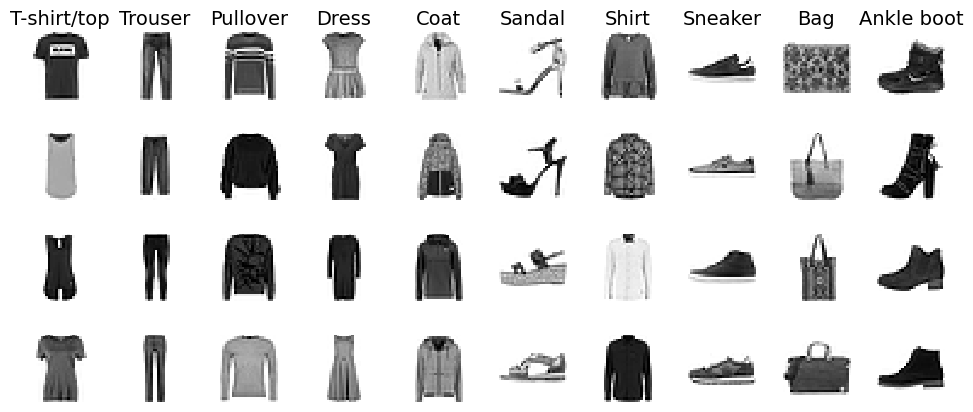

In [17]:
n_rows = 4
plt.figure(figsize=(12, n_rows * 1.2))
for row in range(n_rows):
    for class_index in range(10):
        X_img = X_train[y_train==class_index][row].reshape(28, 28)
        y_img = y_train[y_train==class_index][row]
        plt.subplot(n_rows, 10, 10 * row + class_index + 1)
        plt.imshow(X_img, cmap="binary", interpolation="nearest")
        plt.axis('off')
        if row == 0:
            plt.title(class_names[y_img])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

We’re ready to build the classification MLP:

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

mlp_clf = MLPClassifier(hidden_layer_sizes=[200, 100], verbose=True,
                        early_stopping=True, random_state=42)
pipeline = make_pipeline(MinMaxScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)

Iteration 1, loss = 0.57483807
Validation score: 0.849333
Iteration 2, loss = 0.39938584
Validation score: 0.856833
Iteration 3, loss = 0.35435272
Validation score: 0.869333
Iteration 4, loss = 0.32570927
Validation score: 0.863833
Iteration 5, loss = 0.30588352
Validation score: 0.874167
Iteration 6, loss = 0.29053832
Validation score: 0.874000
Iteration 7, loss = 0.27455976
Validation score: 0.879333
Iteration 8, loss = 0.26407281
Validation score: 0.878500
Iteration 9, loss = 0.25317835
Validation score: 0.882167
Iteration 10, loss = 0.24414312
Validation score: 0.892833
Iteration 11, loss = 0.23601645
Validation score: 0.890000
Iteration 12, loss = 0.23008384
Validation score: 0.887333
Iteration 13, loss = 0.22123722
Validation score: 0.885167
Iteration 14, loss = 0.21190658
Validation score: 0.879333
Iteration 15, loss = 0.20617121
Validation score: 0.892667
Iteration 16, loss = 0.19935674
Validation score: 0.891667
Iteration 17, loss = 0.19323595
Validation score: 0.891667
Iterat

This code is very similar to the regression code we used earlier, but there are a few differences:

* Of course, it’s a classification task so we use an `MLPClassifier` rather than an `MLPRegressor`.
* We use just two hidden layers with 300 and 100 neurons, respectively. You can try a different number of hidden layers, and change the number of neurons as well if you want.
* We also use a `MinMaxScaler` instead of a `StandardScaler`. We need it to shrink the pixel intensities down to the 0–1 range rather than 0–255: having features in this range usually works better with the default hyperparameters used by `MLPClassifier`, such as its default learning rate and weight initialization scale. You might wonder why we didn’t use a `StandardScaler`? Well some pixels don’t vary much across images; for example, the pixels around the edges are almost always white. If we used the `StandardScaler`, these pixels would get scaled up to have the same variance as every other pixel: as a result, we would give more importance to these pixels than they probably deserve. Using the `MinMaxScaler` often works better than the `StandardScaler` for images (but your mileage may vary).
* Lastly, the `score()` function returns the model’s accuracy.

In [19]:
accuracy

0.891

In [20]:
mlp_clf.best_validation_score_

0.8965

In [21]:
mlp_clf.score(X_test, y_test)

0.8722

You will find that the model reaches about 89.7% accuracy on the validation set during training (the exact value is given by `mlp_clf.best_validation_score_`), but it starts overfitting a bit toward the end, so it ends up at just 89.2% accuracy. When we evaluate the model on the test set, we get 87.2%, which is not bad for this task, although we can do better with other neural net architectures such as convolutional neural networks.

You probably noticed that training was quite slow. That’s because the hidden layers have a lot of parameters, so there are many computations to run at each iteration. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! All these parameters give the model quite a lot of flexibility to fit the training data, but it also means that there’s a high risk of overfitting, especially when you do not have a lot of training data. In this case, you may want to use regularization techniques such as early stopping and $L_2$ regularization.

Once the model is trained, you can use it to classify new images:

In [22]:
X_new = X_test[:15]  # let's pretend these are 15 new images
mlp_clf.predict(X_new)

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4])

All these predictions are correct, except for the one at index 12, which should be a 7 (sneaker) instead of a 8 (bag). You might want to know how confident the model was about these predictions, especially the bad one. For this, you can use `model.predict_proba()` instead of `model.predict()`.

In [23]:
y_proba = mlp_clf.predict_proba(X_new)
y_proba[12]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Hmm, that’s not great: the model is telling us that it’s 100% confident that the image represents a bag (index 8). So not only is the model wrong, it’s 100% confident that it’s right. In fact, across all 10,000 images in the test set, there are only 16 images that the model is less than 99.9% confident about, despite the fact that its accuracy is about 90%. That’s why you should always treat estimated probabilities with a grain of salt: neural nets have a strong tendency to be overconfident, especially if they are trained for a bit too long.

Still, getting 90% accuracy on Fashion MNIST is pretty good. You could get even better performance by fine-tuning the hyperparameters, for example using `RandomizedSearchCV`. However, the search space is quite large, so it helps to know roughly where to look.

### 3.2.5 Hyperparameter Tuning Guidelines

The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a basic MLP you can change the number of layers, the number of neurons and the type of activation function to use in each layer, the weight initialization logic, the type of optimizer to use, its learning rate, the batch size, and more. What are some good values for these hyperparameters?

#### 3.2.5.1 Number of Hidden Layers

For many problems, you can begin with a single hidden layer and get reasonable results. An MLP with just one hidden layer can theoretically model even the most complex functions, provided it has enough neurons. But deep networks have a much higher *parameter efficiency* than shallow ones: they can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data. This is because their layered structure enables them to reuse and compose features across multiple levels: for example, the first layer in a face classifier may learn to recognize low-level features such as dots, arcs, or straight lines; while the second layer may learn to combine these low-level features into higher-level features such as squares or circles; and the third layer may learn to combine these higher-level features into a mouth, an eye, or a nose; and the top layer would then be able to use these top-level features to classify faces.

Not only does this hierarchical architecture help DNNs converge faster to a good solution, but it also improves their ability to generalize to new datasets. For example, if you have already trained a model to recognize faces in pictures and you now want to train a new neural network to recognize hairstyles, you can kickstart the training by reusing the lower layers of the first network. Instead of randomly initializing the weights and biases of the first few layers of the new neural network, you can initialize them to the values of the weights and biases of the lower layers of the first network. This way the network will not have to learn from scratch all the low-level structures that occur in most pictures; it will only have to learn the higher-level structures (e.g., hairstyles). This is called *transfer learning*.

In summary, for many problems you can start with just one or two hidden layers, and the neural network will work pretty well. For instance, you can easily reach above 97% accuracy on the MNIST dataset using just one hidden layer with a few hundred neurons, and above 98% accuracy using two hidden layers with the same total number of neurons, in roughly the same amount of training time. For more complex problems, you can ramp up the number of hidden layers until you start overfitting the training set. Very complex tasks, such as large image classification or speech recognition, typically require networks with dozens of layers (or even hundreds, but not fully connected ones), and they need a huge amount of training data. You will rarely have to train such networks from scratch: it is much more common to reuse parts of a pretrained state-of-the-art network that performs a similar task. Training will then be a lot faster and require much less data.

#### 3.2.5.2 Number of Neurons per Hidden Layer

The number of neurons in the input and output layers is determined by the type of input and output your task requires. For example, the MNIST task requires 28 × 28 = 784 inputs and 10 output neurons.

As for the hidden layers, it used to be common to size them to form a pyramid, with fewer and fewer neurons at each layer—the rationale being that many low-level features can coalesce into far fewer high-level features. A typical neural network for MNIST might have 3 hidden layers, the first with 300 neurons, the second with 200, and the third with 100. However, this practice has been largely abandoned because it seems that using the same number of neurons in all hidden layers performs just as well in most cases, or even better; plus, there is only one hyperparameter to tune, instead of one per layer. That said, depending on the dataset, it can sometimes help to make the first hidden layer a bit larger than the others.

Just like the number of layers, you can try increasing the number of neurons gradually until the network starts overfitting. Alternatively, you can try building a model with slightly more layers and neurons than you actually need, then use early stopping and other regularization techniques to prevent it from overfitting too much. Vincent Vanhoucke, a Waymo researcher and former Googler, has dubbed this the “stretch pants” approach: instead of wasting time looking for pants that perfectly match your size, just use large stretch pants that will shrink down to the right size. With this approach, you avoid bottleneck layers that could ruin your model. Indeed, if a layer has too few neurons, it will lack the computational capacity to model complex relationships, and it may not even have enough representational power to preserve all the useful information from the inputs. For example, if you apply PCA to the Fashion MNIST training set, you will find that you need 187 dimensions to preserve 95% of the variance in the data. So if you set the number of neurons in the first hidden layer to some greater number, say 200, you can be confident that this layer will not be a bottleneck. However, you don’t want to add too many neurons, or else the model will have too many parameters to optimize, and it will take more time and data to train.

**Tip**: In general, you will get more bang for your buck by increasing the number of layers rather than the number of neurons per layer.

#### 3.2.5.3 Learning Rate

The learning rate is a hugely important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate (i.e., the learning rate above which the training algorithm diverges). One way to find a good learning rate is to train the model for a few hundred iterations, starting with a very low learning rate (e.g., $10^{-5}$) and gradually increasing it up to a very large value (e.g., $10$). This is done by multiplying the learning rate by a constant factor at each iteration (e.g., by $(10 / 10^{-5})^{1 / 500}$ to go from $10^{-5}$ to $10$ in $500$ iterations). If you plot the loss as a function of the learning rate (using a log scale for the learning rate), you should see it dropping at first. But after a while, the learning rate will be too large, so the loss will shoot back up: the optimal learning rate is often a bit lower than the point at which the loss starts to climb (typically about 10 times lower than the turning point). You can then reinitialize your model and train it normally using this good learning rate.

**Tip**: To change the learning rate during training when using Scikit-Learn, you must set the MLP’s `warm_start` hyperparameter to `True`, and fit the model one batch at a time using `partial_fit()`. Simply update the learning rate at each iteration.

#### 3.2.5.4 Batch Size

The batch size can have a significant impact on your model’s performance and training time. The main benefit of using large batch sizes is that hardware accelerators like GPUs can process them efficiently, so the training algorithm will see more instances per second. Therefore, many researchers and practitioners recommend using the largest batch size that can fit in VRAM (video RAM, i.e., the GPU’s memory). There’s a catch, though: large batch sizes can sometimes lead to training instabilities, especially with smaller models and at the beginning of training, and the resulting model may not generalize as well as a model trained with a small batch size.

However, other research points have shown that it is possible to use very large batch sizes (up to 8,192), along with various techniques such as warming up the learning rate (i.e., starting training with a small learning rate, then ramping it up), to obtain very short training times, without any generalization gap.

So one strategy is to use a large batch size, possibly with learning rate warmup, and if training is unstable or the final performance is disappointing, then try using a smaller batch size instead.

#### 3.2.5.5 Other Hyperparameters

Here are two more hyperparameters you can tune if you have the computation budget and the time:

* **Optimizer**: Choosing a better optimizer than plain old mini-batch gradient descent (and tuning its hyperparameters) can help speed up training and sometimes reach better performance.

* **Activation Function**: We discussed how to choose the activation function earlier: in general, the ReLU activation function is a good default for all hidden layers. In some cases, replacing ReLU with another function can help.

**Tip**: The optimal learning rate depends on the other hyperparameters—especially the batch size—so if you modify any hyperparameter, make sure to tune the learning rate again.

This concludes our introduction to artificial neural networks and their implementation with Scikit-Learn. In the next chapter, we will switch to PyTorch, the leading open source library for neural networks, and we will use it to train and run MLPs much faster by exploiting the power of graphical processing units (GPUs). We will also start building more complex models, with multiple inputs and outputs.

#### **For Further Exploration**

Check out these resources to deepen your understanding of neural networks and related concepts:

Neural Network Playground: 

* [This](https://playground.tensorflow.org/) is a great tool to build your intuitions without writing any code (it was built by the TensorFlow team, but there’s nothing TensorFlow-specific about it; in fact, it doesn’t even use TensorFlow).

Videos:

* [Neural Networks by 3Blue1Brown](https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&si=9zaWZJRy2NmfM_uk)

Google ML Crash Course Readings:
* [Neural Networks](https://developers.google.com/machine-learning/crash-course/neural-networks)

---
**References:**

Disclaimer: Some of the material in this notebook is adapted from other sources. These references are provided for further reading and to acknowledge the original authors.

* Chapter 9 Hands-On Machine Learning with Scikit-Learn and PyTorch by Aurélien Géron, [1st edition](https://learning.oreilly.com/library/view/hands-on-machine-learning/9798341607972/)